<a href="https://colab.research.google.com/github/kashtienooh/CarND-Advanced-Lane-Lines-master/blob/master/Copy_of_Exercise3_XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3 - Explainable Artificial Intelligence (XAI)

#🚨🚨🚨🚨🚨🚨 Please make a local copy in Drive 🚨🚨🚨🚨🚨🚨
File -> Save a copy in Drive

DO NOT run codes directly on this notebook




## Instructions and questions

Let us consider the problem of crack detection in wall images. The task is expressed as binary classification.
You are given the weights of three trained models (`model_A`, `model_B` and `model_C`), and a test data set with positive images (with cracks) and negative images (without cracks).

**Question 1**. Evaluate the performance of the three models on the test set. Report the performance metrics you think are relevant.

**Question 2**. Can you trust the outcomes of these models? Investigate the predictions of each model using at least 3 different explainable AI (XAI) techniques and report your findings.

**Question 3**. Which of the three models would you choose to use in production? Justify your answer.

**Question 4**. For the two other models, how could you explain what happened? Propose ideas to avoid this kind of problems and build more trustworthy models in the future.


**Hints**

Code for data and model loading is given below.

Some useful XAI libraries:

* [captum](https://github.com/pytorch/captum)
* [pytorch-gradcam](https://github.com/jacobgil/pytorch-grad-cam)
* [lime](https://github.com/marcotcr/lime)
* [shap](https://github.com/shap/shap)
* [xplique](https://github.com/deel-ai/xplique)
* ...and many more!


Notebook Author: Florent Forest, Modified by Chi-Ching Hsu

## Download dataset 🔗

In [ ]:
!gdown 1_O6WBWgJ2zQ2FxPDzQUlf8SJB9C91Xqk
!unzip crack_dataset.zip

Downloading...
From (original): https://drive.google.com/uc?id=1_O6WBWgJ2zQ2FxPDzQUlf8SJB9C91Xqk
From (redirected): https://drive.google.com/uc?id=1_O6WBWgJ2zQ2FxPDzQUlf8SJB9C91Xqk&confirm=t&uuid=1fadc02e-7342-4120-acf8-19ccfe1235c7
To: /content/crack_dataset.zip
100% 29.2M/29.2M [00:01<00:00, 27.2MB/s]
Archive:  crack_dataset.zip
   creating: crack_dataset/
   creating: crack_dataset/test_negative/
  inflating: crack_dataset/test_negative/SVS_2_LS21_to_LS22_RS4_0000_0_131_1280_1792.tif  
  inflating: crack_dataset/test_negative/SVS_2_LS21_to_LS22_RS4_0000_0_132_1536_1792.tif  
  inflating: crack_dataset/test_negative/SVS_2_LS21_to_LS22_RS4_0000_0_133_1792_1792.tif  
  inflating: crack_dataset/test_negative/SVS_2_LS21_to_LS22_RS4_0000_0_134_2048_1792.tif  
  inflating: crack_dataset/test_negative/SVS_2_LS21_to_LS22_RS4_0000_0_135_2304_1792.tif  
  inflating: crack_dataset/test_negative/SVS_2_LS21_to_LS22_RS4_0000_0_136_2560_1792.tif  
  inflating: crack_dataset/test_negative/SVS_2_LS21

## Download model 🔗
we download 3 different trained models: model A, model B, and model C

In [ ]:
!gdown 1r8oKA_U_-n6MuPpNa5nG9Tz-YAxMiluA
!gdown 1HTQjeds0WQoggTWO6PoNRm5La_iYGp48
!gdown 1PlZRPxFb8kLlnSAgLGAocKVp5nVUFgHM

Downloading...
From (original): https://drive.google.com/uc?id=1r8oKA_U_-n6MuPpNa5nG9Tz-YAxMiluA
From (redirected): https://drive.google.com/uc?id=1r8oKA_U_-n6MuPpNa5nG9Tz-YAxMiluA&confirm=t&uuid=9df5ee52-eaf1-4bab-9a0f-28373d479c22
To: /content/model_A.pth
100% 53.7M/53.7M [00:02<00:00, 23.6MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1HTQjeds0WQoggTWO6PoNRm5La_iYGp48
From (redirected): https://drive.google.com/uc?id=1HTQjeds0WQoggTWO6PoNRm5La_iYGp48&confirm=t&uuid=bd26cdbc-b081-404e-aa3c-3b52aaeda547
To: /content/model_B.pth
100% 53.7M/53.7M [00:02<00:00, 19.7MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1PlZRPxFb8kLlnSAgLGAocKVp5nVUFgHM
From (redirected): https://drive.google.com/uc?id=1PlZRPxFb8kLlnSAgLGAocKVp5nVUFgHM&confirm=t&uuid=54b13660-bf19-47c9-93be-d252e2e223a8
To: /content/model_C.pth
100% 53.7M/53.7M [00:02<00:00, 23.5MB/s]


In [ ]:
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 11.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  U

## Imports 💼

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.utils.data import ConcatDataset, Dataset
import torchvision
from torchvision import transforms as T
from torchvision.transforms import functional as F

base_path = "."  # CHANGE THIS PATH

In [ ]:
# Data transformations

class Compose:
    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, image, target=None):
        for t in self.transforms:
            image, target = t(image, target)
        return image, target

class ToTensor:
    def __call__(self, image, target=None):
        image = F.to_tensor(image)
        if target is not None:
            target = torch.as_tensor(target, dtype=torch.int64)
        return image, target

class RandomResize:
    def __init__(self, min_size, max_size=None):
        self.min_size = min_size
        if max_size is None:
            max_size = min_size
        self.max_size = max_size

    def __call__(self, image, target=None):
        size = random.randint(self.min_size, self.max_size)
        image = F.resize(image, size)
        if target is not None:
            target = F.resize(target.unsqueeze(0), size, interpolation=F.InterpolationMode.NEAREST).squeeze(0)
        return image, target


class RandomHorizontalFlip:
    def __init__(self, flip_prob):
        self.flip_prob = flip_prob

    def __call__(self, image, target=None):
        if random.random() < self.flip_prob:
            image = F.hflip(image)
            if target is not None:
                target = F.hflip(target)
        return image, target


class RandomVerticalFlip:
    def __init__(self, flip_prob):
        self.flip_prob = flip_prob

    def __call__(self, image, target=None):
        if random.random() < self.flip_prob:
            image = F.vflip(image)
            if target is not None:
                target = F.vflip(target)
        return image, target

def get_train_transform(crop_size=64, size=256):
    transforms = [
        ToTensor(),
        RandomResize(size),
        RandomHorizontalFlip(flip_prob=0.5),
        RandomVerticalFlip(flip_prob=0.5)
    ]
    return Compose(transforms)


def get_val_transform(crop_size=64, size=256):
    transforms = [
        ToTensor(),
        RandomResize(size)
    ]
    return Compose(transforms)

In [ ]:
# Dataset class

TRAIN_IMAGES_POSITIVE = [
    "train_positive"
]

TRAIN_IMAGES_NEGATIVE = [
    "train_negative"
]

TRAIN_IMAGES = TRAIN_IMAGES_POSITIVE + TRAIN_IMAGES_NEGATIVE

VAL_IMAGES_POSITIVE = [
    "val_positive"
]

VAL_IMAGES_NEGATIVE = [
    "val_negative"
]

VAL_IMAGES = VAL_IMAGES_POSITIVE + VAL_IMAGES_NEGATIVE

TEST_IMAGES_POSITIVE = [
    "test_positive"
]

TEST_IMAGES_NEGATIVE = [
    "test_negative"
]

TEST_IMAGES = TEST_IMAGES_POSITIVE + TEST_IMAGES_NEGATIVE

SEED = 42


class DICCracksDatasetFold(Dataset):
    def __init__(self, root, fold="train", segmentation=True, transform=None):
        """
        fold: train, val or test
        """
        self.root = root
        self.fold = fold
        self.segmentation = segmentation
        self.images = sorted(os.listdir(os.path.join(root, fold)))

        if os.path.exists(os.path.join(root, fold + "_GT")):
            self.masks = sorted(os.listdir(os.path.join(root, fold + "_GT")))
        else:
            self.masks = [None] * len(self.images)

        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        mask = self.masks[idx]

        image = cv2.imread(os.path.join(self.root, self.fold, image))
        if mask is not None:
            mask = cv2.imread(os.path.join(self.root, self.fold + "_GT", mask), cv2.IMREAD_GRAYSCALE) / 255
        else:
            mask = np.zeros((image.shape[0], image.shape[1]), dtype="uint8")

        if self.transform is not None:
            image, mask = self.transform(image, mask)

        if not self.segmentation:
            mask = mask.max().item()  # binary classification label

        return image, mask, self.images[idx]


class DICCracksDataset(ConcatDataset):
    def __init__(self, root, fold="train", segmentation=True, positive_only=False, negative_only=False, **kwargs):
        assert fold in ["train", "val", "test"], f"fold {fold} not in train, val or test"

        if fold == "val":
            if positive_only:
                self.folds = VAL_IMAGES_POSITIVE
            elif negative_only:
                self.folds = VAL_IMAGES_NEGATIVE
            else:
                self.folds = VAL_IMAGES
        elif fold == "test":
            if positive_only:
                self.folds = TEST_IMAGES_POSITIVE
            elif negative_only:
                self.folds = TEST_IMAGES_NEGATIVE
            else:
                self.folds = TEST_IMAGES
        elif fold == "train":
            if positive_only:
                self.folds = TRAIN_IMAGES_POSITIVE
            elif negative_only:
                self.folds = TEST_IMAGES_NEGATIVE
            else:
                self.folds = TRAIN_IMAGES
        else:
            raise NotImplementedError()

        # initialize a concat dataset with the corresponding folds
        super().__init__(
            [
                DICCracksDatasetFold(root, fold, segmentation, **kwargs)
                for fold in self.folds
            ]
        )

In [ ]:
ds_test = DICCracksDataset(
    root=os.path.join(base_path, "crack_dataset"),
    fold="test",
    transform=get_val_transform(),
    segmentation=False
)

batch_size = 8
test_loader = torch.utils.data.DataLoader(
    ds_test, batch_size=batch_size, drop_last=False
)

Label =  1


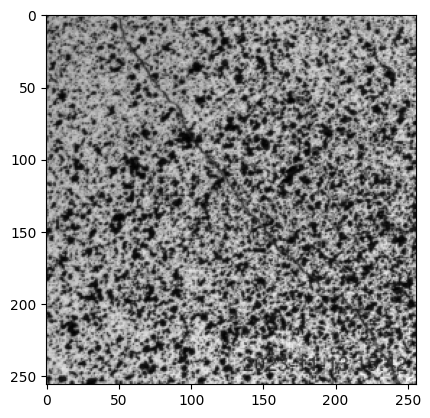

In [ ]:
img, label, _ = ds_test[0]
print("Label = ", label)
plt.imshow(img[0].numpy(), cmap="gray");

In [ ]:
models = {
    "A": os.path.join(base_path, "model_A.pth"),
    "B": os.path.join(base_path, "model_B.pth"),
    "C": os.path.join(base_path, "model_C.pth")
}

In [ ]:
def build_model(weights):
    # Create VGG11 model
    model = torchvision.models.vgg11()
    # modify average pooling for 256*256 inputs (instead of 224*224)
    model.avgpool = nn.AdaptiveAvgPool2d((8, 8))
    # modify the classification head to use 128 neurons instead of 4096
    (
        model.classifier[0],
        model.classifier[3],
        model.classifier[6],
    ) = (nn.Linear(512 * 8 * 8, 128), nn.Linear(128, 128), nn.Linear(128, 2))

    # Load weights
    model.load_state_dict(torch.load(weights, map_location=torch.device('cpu')))
    return model

In [ ]:
model_A, model_B, model_C = (build_model(models[id]) for id in ("A", "B", "C"))

**Question 1**. Evaluate the performance of the three models on the test set. Report the performance metrics you think are relevant.

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix
)

def evaluate(model, dataloader):
    y_true = np.concatenate([y for x, y, _ in dataloader])
    y_pred = np.concatenate([model(x).argmax(axis=1) for x, y, _ in dataloader])

    print()
    print(y_true)
    print(y_pred)
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    print("test_accuracy", accuracy_score(y_true, y_pred))
    print("test_balanced_accuracy", balanced_accuracy_score(y_true, y_pred))
    print("test_f1_score", f1_score(y_true, y_pred))
    print("test_precision", precision_score(y_true, y_pred))
    print("test_recall", recall_score(y_true, y_pred))
    print("test_tpr", cm[1,1] / (cm[1,1] + cm[1,0]))
    print("test_tnr", cm[0,0] / (cm[0,0] + cm[0,1]))

In [ ]:
evaluate(model_A, test_loader)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
evaluate(model_B, test_loader)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
evaluate(model_C, test_loader)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

The evaluation shows that model A achieves perfect classification of the test set. Model B has the lowest performance of the three models (88% balanced accuracy), while model C has 96.5% balanced accuracy.

**Question 2**. Can you trust the outcomes of these models? Investigate the predictions of each model using at least 3 different explainable AI (XAI) techniques and report your findings.

1
torch.Size([3, 256, 256])
(1, 256, 256)


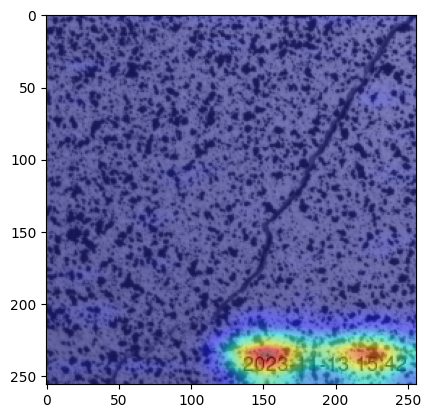

(1, 256, 256)


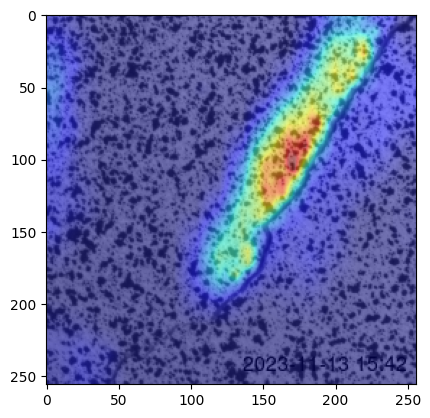

(1, 256, 256)


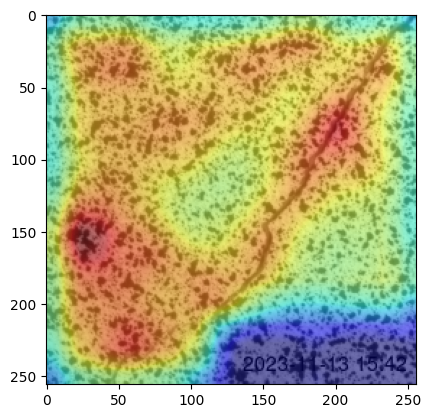

In [ ]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

idx = 95
image, label, _ = ds_test[idx]
print(label)
print(image.shape)
for model in (model_A, model_B, model_C):
    plt.imshow(image[0].numpy(), cmap="gray")
    map = GradCAM(model=model, target_layers=[model.features[i] for i in (13, 16, 18)])
    attribution = map(input_tensor=image.unsqueeze(0), targets=[ClassifierOutputTarget(1)])
    print(attribution.shape)
    plt.imshow(attribution[0], cmap="jet", alpha=0.5);
    plt.show();

0
torch.Size([3, 256, 256])
(1, 256, 256)


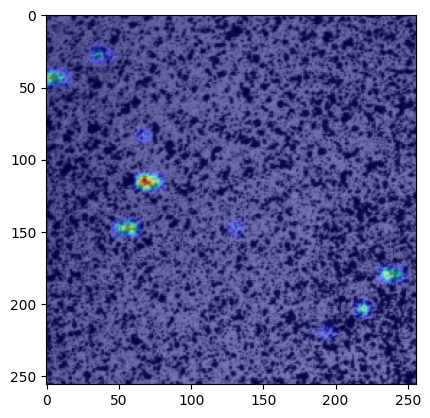

(1, 256, 256)


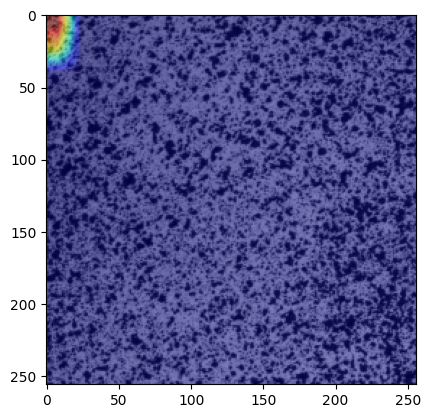

(1, 256, 256)


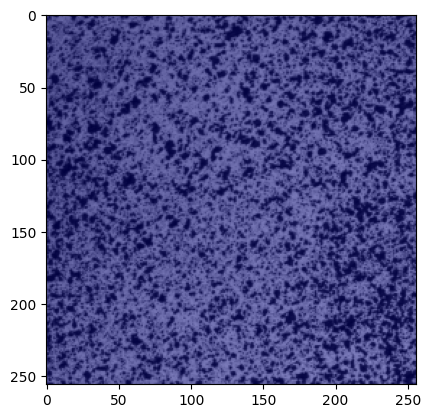

In [ ]:
idx = 100
image, label, _ = ds_test[idx]
print(label)
print(image.shape)
for model in (model_A, model_B, model_C):
    plt.imshow(image[0].numpy(), cmap="gray")
    map = GradCAM(model=model, target_layers=[model.features[i] for i in (13, 16, 18)])
    attribution = map(input_tensor=image.unsqueeze(0), targets=[ClassifierOutputTarget(1)])
    print(attribution.shape)
    plt.imshow(attribution[0], cmap="jet", alpha=0.5);
    plt.show();

Using attribution maps (XAI techniques showing the importance of input features for the decision), we notice that:
* model A is always focusing on the timestamp text in the lower right corner
* model B focuses on the crack region
* model C exhibits attributions that are rather spread over the entire image

**Question 3**. Which of the three models would you choose to use in production? Justify your answer.


It appears that model A and C are focusing on features that are not relevant to the task, and rather use *shortcuts* to reach a correct classification. This phenomenon can be related to *spurious correlations* or *["clever Hans effect"](https://www.britannica.com/topic/Clever-Hans)*.

For this reason, these models may not behave reliably and perform well on real-world test data.

On the other hand, model B is focusing on the relevant region of the images, which is a good sign of robustness. Even if it has the lowest performance on the test set, model B should be trusted more.


**Question 4**. For the two other models, how could you explain what happened? Propose ideas to avoid this kind of problems and build more trustworthy models in the future.

By looking at the test set images, it appears that there is only a timestamp text on the positive images, not negative. This explains why using the sortcut of detecting this text yields perfect accuracy for model A.
A possible explanation is that it was also the case for the training data of model A, and the model simply learned to detect the text instead of the crack.

The issue of model C is less clear, but appears to affect the entire image. Let us visualize the distribution of pixel grayscale intensities for each class:

In [ ]:
intensity_pos = np.array([x.mean() for x, y, _ in ds_test if y == 1])
intensity_neg = np.array([x.mean() for x, y, _ in ds_test if y == 0])

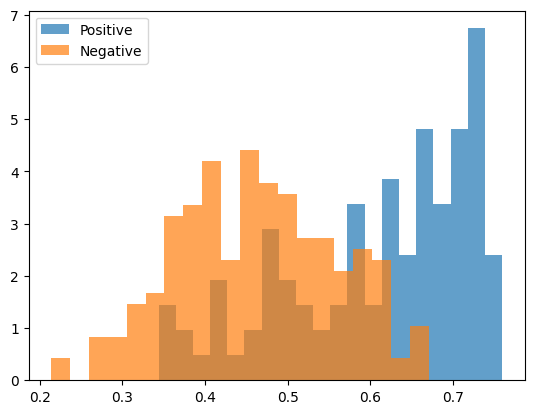

In [ ]:
plt.hist(intensity_pos, bins=20, density=True, label="Positive", alpha=0.7);
plt.hist(intensity_neg, bins=20, density=True, label="Negative", alpha=0.7);
plt.legend();

The mean intensity of the positive images is significantly higher than for negative images. In other words, the positive images are brighter on average. As a consequence, the model could learn to use this difference in intensity as a shortcut for classification. It could be what happened for model C.

This may also be due to training data contamination.

Such a problem could easily arise in the real world whenever data is not collected in the same conditions (e.g., different type of sensor, calibration, environment).

Main take-home message: do not trust your model nor your data! XAI tools are very useful to uncover such issues.